In [1]:
# This code is taken from https://lscsoft.docs.ligo.org/bilby/visualising_the_results.html

import bilby
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
duration = 4
sampling_frequency = 2048
outdir = "visualising_the_results"
label = "example"

injection_parameters = dict(
    mass_1=36.0,
    mass_2=29.0,
    a_1=0.4,
    a_2=0.3,
    tilt_1=0.5,
    tilt_2=1.0,
    phi_12=1.7,
    phi_jl=0.3,
    luminosity_distance=1000.0,
    theta_jn=0.4,
    phase=1.3,
    ra=1.375,
    dec=-1.2108,
    geocent_time=1126259642.413,
    psi=2.659,
)

In [3]:
# specify waveform arguments
waveform_arguments = dict(
    waveform_approximant="IMRPhenomXP",  # waveform approximant name
    reference_frequency=50.0,  # gravitational waveform reference frequency (Hz)
)

# set up the waveform generator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    sampling_frequency=sampling_frequency,
    duration=duration,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameters=injection_parameters,
    waveform_arguments=waveform_arguments,
)

21:45 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [4]:
ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
ifos.set_strain_data_from_power_spectral_densities(
    duration=duration,
    sampling_frequency=sampling_frequency,
    start_time=injection_parameters["geocent_time"] - 2,
)
_ = ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)

21:46 bilby INFO    : Injected signal in H1:
21:46 bilby INFO    :   optimal SNR = 23.78
21:46 bilby INFO    :   matched filter SNR = 23.85-0.47j
21:46 bilby INFO    :   mass_1 = 36.0
21:46 bilby INFO    :   mass_2 = 29.0
21:46 bilby INFO    :   a_1 = 0.4
21:46 bilby INFO    :   a_2 = 0.3
21:46 bilby INFO    :   tilt_1 = 0.5
21:46 bilby INFO    :   tilt_2 = 1.0
21:46 bilby INFO    :   phi_12 = 1.7
21:46 bilby INFO    :   phi_jl = 0.3
21:46 bilby INFO    :   luminosity_distance = 1000.0
21:46 bilby INFO    :   theta_jn = 0.4
21:46 bilby INFO    :   phase = 1.3
21:46 bilby INFO    :   ra = 1.375
21:46 bilby INFO    :   dec = -1.2108
21:46 bilby INFO    :   geocent_time = 1126259642.413
21:46 bilby INFO    :   psi = 2.659
21:46 bilby INFO    : Injected signal in L1:
21:46 bilby INFO    :   optimal SNR = 19.25
21:46 bilby INFO    :   matched filter SNR = 19.73+0.84j
21:46 bilby INFO    :   mass_1 = 36.0
21:46 bilby INFO    :   mass_2 = 29.0
21:46 bilby INFO    :   a_1 = 0.4
21:46 bilby INF

In [5]:
# first, set up all priors to be equal to a delta function at their designated value
priors = bilby.gw.prior.BBHPriorDict(injection_parameters.copy())
# then, reset the priors on the masses and luminosity distance to conduct a search over these parameters
priors["mass_1"] = bilby.core.prior.Uniform(25, 40, "mass_1")
priors["mass_2"] = bilby.core.prior.Uniform(25, 40, "mass_2")
priors["luminosity_distance"] = bilby.core.prior.Uniform(
    400, 2000, "luminosity_distance"
)

In [6]:
# compute the likelihoods
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator
)


In [7]:
result = bilby.core.sampler.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler="dynesty",
    npoints=100,
    injection_parameters=injection_parameters,
    outdir=outdir,
    label=label,
    walks=5,
    nact=2,
)

21:47 bilby INFO    : Running for label 'example', output will be saved to 'visualising_the_results'
21:47 bilby INFO    : Using lal version 7.2.4
21:47 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.10;Id: 7b5f0cd16657f3595328df5351b26e83a8b58c37;;Builder: Unknown User <>;Repository status: CLEAN: All modifications committed
21:47 bilby INFO    : Using lalsimulation version 4.0.2
21:47 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.10;Id: 7b5f0cd16657f3595328df5351b26e83a8b58c37;;Builder: Unknown User <>;Repository status: CLEAN: All modifications committed
21:47 bilby INFO    : Search parameters:
21:47 bilby INFO    :   mass_1 = Uniform(minimum=25, maximum=40, name='mass_1', latex_label='$m_1$', unit=None, boundary=None)
21:47 bilby INFO    :   mass_2 = Uniform(minimum=25, maximum=40, name='mass_2', latex_label='$m_2$', unit=None, boundary=None)
21:47 bilby INFO    :   luminosity_distance = Uniform(minimum=400, maximum=2000, name='l

0it [00:00, ?it/s]

21:47 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'print_progress': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 100, 'first_update': None, 'walks': 5, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 60, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f98b80093a0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2, 'print_method': 'tqdm'}
21:47 bilby INFO    : Checkpoint every check_point_delta_t = 600s
21:47 bilby INFO    : Using dynesty version 1.0.1
21:47 bilby INFO    : Using the bilby-implemented rwalk

In [8]:
!ls visualising_the_results/


example_checkpoint_run.png        example_dynesty.pickle
example_checkpoint_stats.png      example_result.json
example_checkpoint_trace.png      example_resume.pickle
example_checkpoint_trace_unit.png


In [9]:
result.plot_corner()
plt.show()
plt.close()

/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/xarray/core/npcompat.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) >= "1.20.0":
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pdcompat.p

21:51 bilby INFO    : Generating waveform figure for H1
21:51 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


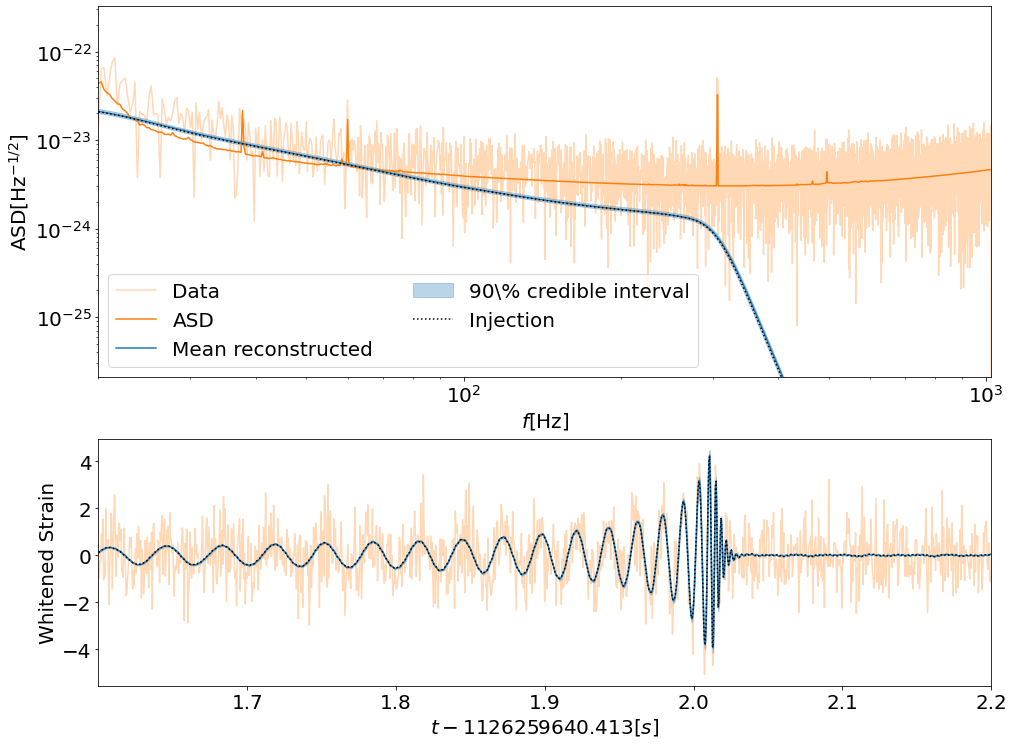

21:51 bilby INFO    : Generating waveform figure for L1
21:51 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


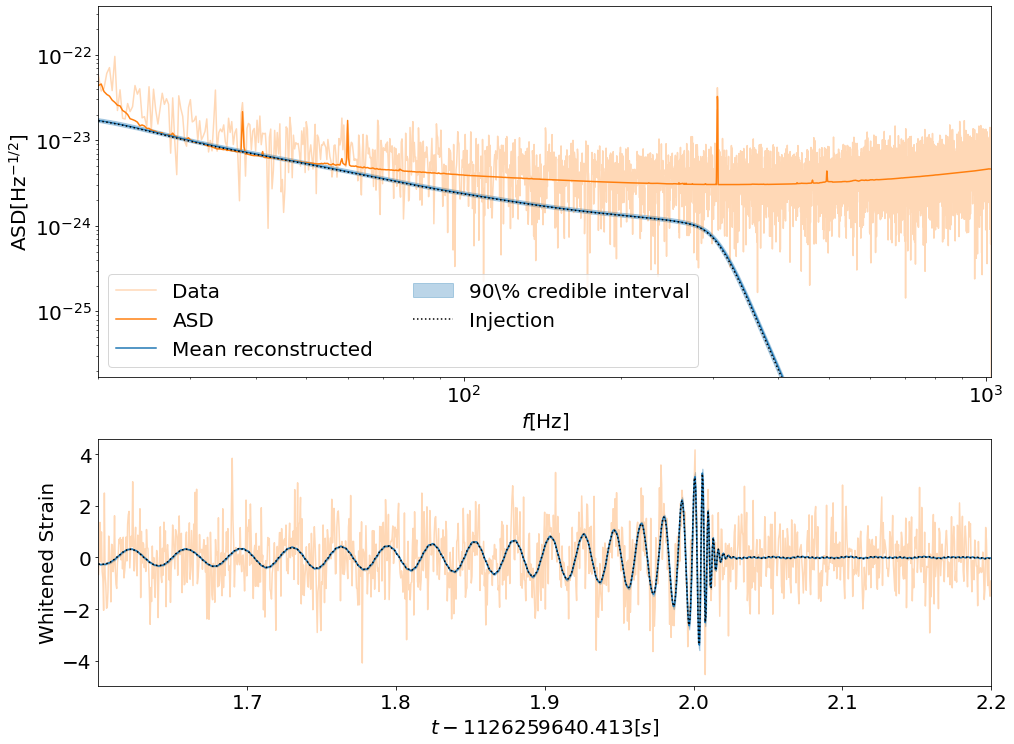

In [10]:
from bilby.gw.result import CBCResult

cbc_result = CBCResult.from_json("visualising_the_results/example_result.json")
for ifo in ifos:
    cbc_result.plot_interferometer_waveform_posterior(
        interferometer=ifo, n_samples=500, save=False
    )
    plt.show()
    plt.close()

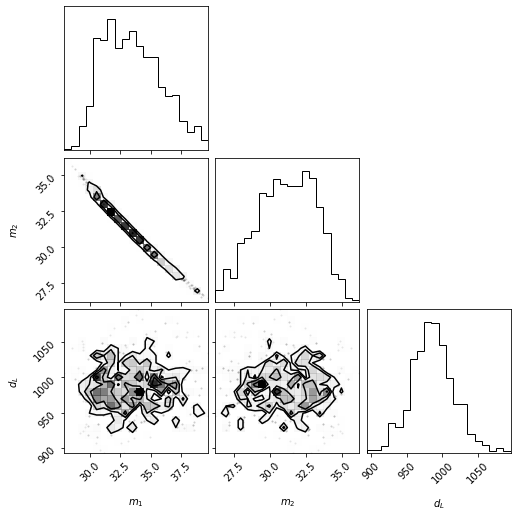

In [11]:
import corner

samples = result.samples
labels = result.parameter_labels
fig = corner.corner(samples, labels=labels)
plt.show()
plt.close()